<a href="https://colab.research.google.com/github/shumshersubashgautam/Bird_Sound_Classify_Neural_Network/blob/main/Bird_Sound_Classification_BirdCLEF2023_kenya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install -q kaggle

In [15]:
from google.colab import files

files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"shumshersubash2018","key":"f147ab838df934330c5631a31b26bec8"}'}

In [16]:
!mkdir ~/.kaggle

In [17]:
!cp kaggle.json ~/.kaggle/

In [18]:
 !chmod 600 ~/.kaggle/kaggle.json

In [19]:
!kaggle competitions download -c birdclef-2023

100% 4.91G/4.91G [02:26<00:00, 37.2MB/s]
100% 4.91G/4.91G [02:26<00:00, 36.1MB/s]


In [20]:
!mkdir bird

In [21]:
!unzip birdclef-2023.zip -d bird

Streaming output truncated to the last 5000 lines.
  inflating: bird/train_audio/rerswa1/XC330427.ogg  
  inflating: bird/train_audio/rerswa1/XC330925.ogg  
  inflating: bird/train_audio/rerswa1/XC331732.ogg  
  inflating: bird/train_audio/rerswa1/XC333007.ogg  
  inflating: bird/train_audio/rerswa1/XC333008.ogg  
  inflating: bird/train_audio/rerswa1/XC333855.ogg  
  inflating: bird/train_audio/rerswa1/XC334159.ogg  
  inflating: bird/train_audio/rerswa1/XC334160.ogg  
  inflating: bird/train_audio/rerswa1/XC334161.ogg  
  inflating: bird/train_audio/rerswa1/XC370598.ogg  
  inflating: bird/train_audio/rerswa1/XC371021.ogg  
  inflating: bird/train_audio/rerswa1/XC371367.ogg  
  inflating: bird/train_audio/rerswa1/XC376096.ogg  
  inflating: bird/train_audio/rerswa1/XC379520.ogg  
  inflating: bird/train_audio/rerswa1/XC381917.ogg  
  inflating: bird/train_audio/rerswa1/XC382091.ogg  
  inflating: bird/train_audio/rerswa1/XC383377.ogg  
  inflating: bird/train_audio/rerswa1/XC383401.o

In [22]:
import pandas as pd

df = pd.read_csv('/content/bird/train_metadata.csv')
df

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,url,filename
0,abethr1,[],['song'],4.3906,38.2788,Turdus tephronotus,African Bare-eyed Thrush,Rolf A. de By,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/128013,abethr1/XC128013.ogg
1,abethr1,[],['call'],-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,3.5,https://www.xeno-canto.org/363501,abethr1/XC363501.ogg
2,abethr1,[],['song'],-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,3.5,https://www.xeno-canto.org/363502,abethr1/XC363502.ogg
3,abethr1,[],['song'],-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,5.0,https://www.xeno-canto.org/363503,abethr1/XC363503.ogg
4,abethr1,[],"['call', 'song']",-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,4.5,https://www.xeno-canto.org/363504,abethr1/XC363504.ogg
...,...,...,...,...,...,...,...,...,...,...,...,...
16936,yewgre1,[],[''],-1.2502,29.7971,Eurillas latirostris,Yellow-whiskered Greenbul,András Schmidt,Creative Commons Attribution-NonCommercial-Sha...,3.0,https://xeno-canto.org/703472,yewgre1/XC703472.ogg
16937,yewgre1,[],[''],-1.2489,29.7923,Eurillas latirostris,Yellow-whiskered Greenbul,András Schmidt,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://xeno-canto.org/703485,yewgre1/XC703485.ogg
16938,yewgre1,[],[''],-1.2433,29.7844,Eurillas latirostris,Yellow-whiskered Greenbul,András Schmidt,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://xeno-canto.org/704433,yewgre1/XC704433.ogg
16939,yewgre1,[],[''],0.0452,36.3699,Eurillas latirostris,Yellow-whiskered Greenbul,Lars Lachmann,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://xeno-canto.org/752974,yewgre1/XC752974.ogg


In [23]:
import plotly.express as px

primary_label_counts = df.primary_label.value_counts()

px.bar(
    x=primary_label_counts.keys(), 
    y=primary_label_counts.values,
    title="Distribution of primary labels",
    labels={"x": "bird", "y": "# of recordings"},
).show()

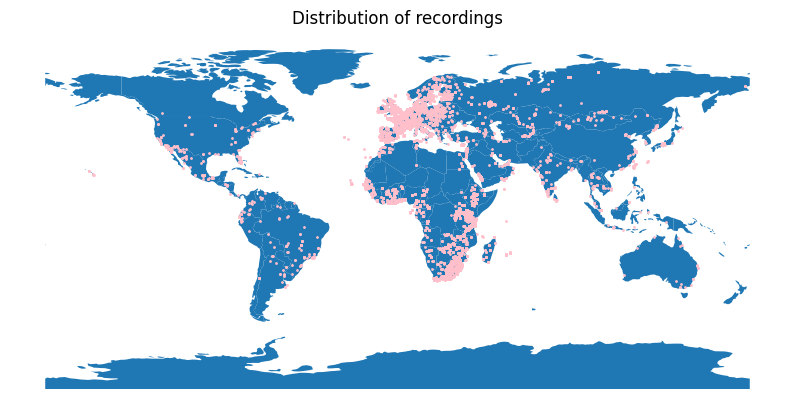

In [26]:
from shapely.geometry import Point
import geopandas as gpd

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 6))
ax.set_axis_off()
ax.set_title('Distribution of recordings')
gdf.plot(ax=ax, marker='o', color='pink', markersize=1);

In [25]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 95.5 MB/s eta 0:00:00


In [27]:
kenya = world[world['name'] == 'Kenya']
kenya_poly = kenya['geometry'].item()
df['is_in_kenya'] = [kenya_poly.contains(p) for p in geometry]
kenya_df = df[df.is_in_kenya].reset_index()
kenya_df

/usr/local/lib/python3.9/dist-packages/shapely/predicates.py:540: RuntimeWarning:

invalid value encountered in contains



,index,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,url,filename,geometry,is_in_kenya
0,1,abethr1,[],['call'],-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,3.5,https://www.xeno-canto.org/363501,abethr1/XC363501.ogg,POINT (38.29210 -2.95240),True
1,2,abethr1,[],['song'],-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,3.5,https://www.xeno-canto.org/363502,abethr1/XC363502.ogg,POINT (38.29210 -2.95240),True
2,3,abethr1,[],['song'],-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,5.0,https://www.xeno-canto.org/363503,abethr1/XC363503.ogg,POINT (38.29210 -2.95240),True
3,4,abethr1,[],"['call', 'song']",-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,4.5,https://www.xeno-canto.org/363504,abethr1/XC363504.ogg,POINT (38.29210 -2.95240),True
4,5,abethr1,['rbsrob1'],['song'],-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,3.5,https://www.xeno-canto.org/379322,abethr1/XC379322.ogg,POINT (38.29210 -2.95240),True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,16929,yewgre1,[],['alarm call'],0.0697,35.6089,Eurillas latirostris,Yellow-whiskered Greenbul,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,3.0,https://www.xeno-canto.org/537944,yewgre1/XC537944.ogg,POINT (35.60890 0.06970),True
2494,16932,yewgre1,[],"['adult', 'sex uncertain', 'song']",-1.2474,36.8231,Eurillas latirostris,Yellow-whiskered Greenbul,isaac kilusu,Creative Commons Attribution-NonCommercial-Sha...,3.0,http://xeno-canto.org/675466,yewgre1/XC675466.ogg,POINT (36.82310 -1.24740),True
2495,16933,yewgre1,[],"['adult', 'sex uncertain', 'song']",-1.2474,36.8231,Eurillas latirostris,Yellow-whiskered Greenbul,isaac kilusu,Creative Commons Attribution-NonCommercial-Sha...,3.0,http://xeno-canto.org/675467,yewgre1/XC675467.ogg,POINT (36.82310 -1.24740),True
2496,16939,yewgre1,[],[''],0.0452,36.3699,Eurillas latirostris,Yellow-whiskered Greenbul,Lars Lachmann,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://xeno-canto.org/752974,yewgre1/XC752974.ogg,POINT (36.36990 0.04520),True


In [28]:
kenya_primary_label_counts = kenya_df.primary_label.value_counts()

px.bar(
    x=kenya_primary_label_counts.keys(), 
    y=kenya_primary_label_counts.values,
    title="Distribution of primary labels in kenya",
    labels={"x": "bird", "y": "# of recordings"},
).show()

kenya_primary_label_counts

gnbcam2    75
spmthr1    63
ratcis1    61
rbsrob1    51
trobou1    42
           ..
refwar2     1
rufcha2     1
blwlap1     1
strher      1
litegr      1
Name: primary_label, Length: 231, dtype: int64

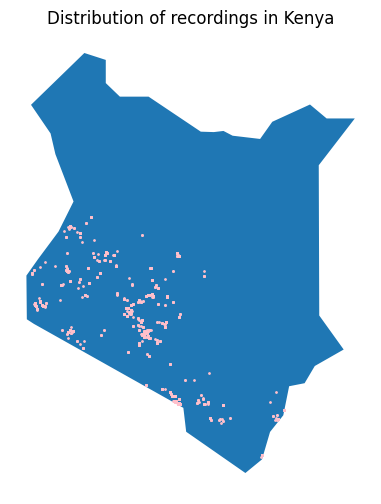

In [29]:
kenya_geometry = [Point(xy) for xy in zip(kenya_df['longitude'], kenya_df['latitude'])]
gdf = gpd.GeoDataFrame(kenya_df, geometry=kenya_geometry)
ax = kenya.plot(figsize=(10, 6))
ax.set_axis_off()
ax.set_title('Distribution of recordings in Kenya')
gdf.plot(ax=ax, marker='o', color='pink', markersize=1);

In [30]:
counts_df = pd.concat([
    pd.DataFrame({
        "label": primary_label_counts.keys(), 
        "num_recordings": 100 * primary_label_counts.values / primary_label_counts.values.sum(),
        "place": "world"
    }),
    pd.DataFrame({
        "label": kenya_primary_label_counts.keys(), 
        "num_recordings": 100 * kenya_primary_label_counts.values / kenya_primary_label_counts.values.sum(),
        "place": "kenya"
    })
])

px.bar(
    data_frame=counts_df,
    x="label", 
    y="num_recordings",
    color="place",
    title="Distribution of primary labels, as a % of the total recordings in the world or in keyna",
    barmode="group",
    labels={"num_recordings": "% of recordings"}
).show()


In [31]:
nonkenya_primary_label_counts = df[-df.is_in_kenya].primary_label.value_counts()

counts_df = pd.concat([
    pd.DataFrame({
        "label": nonkenya_primary_label_counts.keys(), 
        "num_recordings": 100 * nonkenya_primary_label_counts.values / nonkenya_primary_label_counts.values.sum(),
        "place": "not keyna"
    }),
    pd.DataFrame({
        "label": kenya_primary_label_counts.keys(), 
        "num_recordings": 100 * kenya_primary_label_counts.values / kenya_primary_label_counts.values.sum(),
        "place": "kenya"
    })
])

px.bar(
    data_frame=counts_df,
    x="label", 
    y="num_recordings",
    color="place",
    title="Distribution of primary labels, as a % of the total recordings not in kenya vs in keyna",
    barmode="group",
    labels={"num_recordings": "% of recordings"}
).show()

In [32]:
print('birds exclusive to kenya')
set(df[df.is_in_kenya].primary_label.unique()) - set(df[-df.is_in_kenya].primary_label.unique())

birds exclusive to kenya


{'brrwhe3', 'hipbab1', 'pabspa1', 'whctur2'}

In [33]:
secondary_labels = df[df.secondary_labels != '[]'].reset_index()
print (len(secondary_labels) / len(df))
secondary_labels

0.13606044507408063


,index,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,url,filename,geometry,is_in_kenya
0,5,abethr1,['rbsrob1'],['song'],-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,3.5,https://www.xeno-canto.org/379322,abethr1/XC379322.ogg,POINT (38.29210 -2.95240),True
1,11,abethr1,"['eswdov1', 'helgui', 'rindov']",['song'],-2.8802,38.1861,Turdus tephronotus,African Bare-eyed Thrush,Sidney Shema,Creative Commons Attribution-NonCommercial-Sha...,4.5,https://www.xeno-canto.org/606253,abethr1/XC606253.ogg,POINT (38.18610 -2.88020),True
2,15,abhori1,['combul2'],"['call', 'song']",-15.9259,29.0292,Oriolus larvatus,African Black-headed Oriole,Rory Nefdt,Creative Commons Attribution-NonCommercial-Sha...,3.5,https://www.xeno-canto.org/120250,abhori1/XC120250.ogg,POINT (29.02920 -15.92590),False
3,16,abhori1,['rindov'],"['call', 'song']",-15.9259,29.0292,Oriolus larvatus,African Black-headed Oriole,Rory Nefdt,Creative Commons Attribution-NonCommercial-Sha...,4.5,https://www.xeno-canto.org/120251,abhori1/XC120251.ogg,POINT (29.02920 -15.92590),False
4,17,abhori1,"['blbpuf2', 'fotdro5', 'reedov1']",['song'],-5.7214,37.9942,Oriolus larvatus,African Black-headed Oriole,David Moyer,Creative Commons Attribution-NonCommercial-Sha...,3.5,https://www.xeno-canto.org/127317,abhori1/XC127317.ogg,POINT (37.99420 -5.72140),False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300,16903,yewgre1,['yesbar1'],['call'],5.3207,-1.4191,Eurillas latirostris,Yellow-whiskered Greenbul,Peter de Rouw,Creative Commons Attribution-NonCommercial-Sha...,3.5,https://www.xeno-canto.org/397563,yewgre1/XC397563.ogg,POINT (-1.41910 5.32070),False
2301,16906,yewgre1,['combul2'],['song'],-1.1359,36.7160,Eurillas latirostris,Yellow-whiskered Greenbul,Rory Nefdt,Creative Commons Attribution-NonCommercial-Sha...,4.5,https://www.xeno-canto.org/399131,yewgre1/XC399131.ogg,POINT (36.71600 -1.13590),True
2302,16913,yewgre1,"['combul2', 'grbcam1']","['female', 'male', 'song']",6.8341,3.9593,Eurillas latirostris,Yellow-whiskered Greenbul,Lars Lachmann,Creative Commons Attribution-NonCommercial-Sha...,2.5,https://www.xeno-canto.org/401892,yewgre1/XC401892.ogg,POINT (3.95930 6.83410),False
2303,16915,yewgre1,['hartur1'],['song'],-1.0173,36.6781,Eurillas latirostris,Yellow-whiskered Greenbul,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,3.5,https://www.xeno-canto.org/429122,yewgre1/XC429122.ogg,POINT (36.67810 -1.01730),True


In [34]:
labels = [e[2:-2].split("', '") for e in secondary_labels.secondary_labels]
labels = [e for li in labels for e in li]
secondary_label_counts = pd.DataFrame({'secondary_label': labels}).secondary_label.value_counts()

px.bar(
    x=secondary_label_counts.keys(), 
    y=secondary_label_counts.values,
    title="Distribution of secondary labels",
    labels={"x": "bird", "y": "# of recordings"},
).show()


In [35]:
primarey_secondary_counts_df = pd.concat([
    pd.DataFrame({
        "label": primary_label_counts.keys(), 
        "num_recordings": primary_label_counts.values,
        "type": "primary"
    }),
    pd.DataFrame({
        "label": secondary_label_counts.keys(), 
        "num_recordings": secondary_label_counts.values,
        "type": "secondary"
    })
])

px.bar(
    data_frame=primarey_secondary_counts_df,
    x="label", 
    y="num_recordings",
    color="type",
    title="Distribution of primary vs secondary labels",
    barmode="group",
    labels={"num_recordings": "# of recordings"}
).show()


In [36]:
all_birds = pd.DataFrame({
    "label": primary_label_counts.keys(), 
    "num_primary_recordings": primary_label_counts.values,
}).set_index('label').join(
    pd.DataFrame({
        "label": secondary_label_counts.keys(), 
        "num_secondary_recordings": secondary_label_counts.values,
    }).set_index('label'),
)

print('birds that are more frequent as secondary labels:')
all_birds[all_birds.num_primary_recordings < all_birds.num_secondary_recordings]

birds that are more frequent as secondary labels:


,num_primary_recordings,num_secondary_recordings
label,,
combul2,293,349.0
rindov,116,200.0
grbcam1,94,130.0
reedov1,70,92.0
eswdov1,63,69.0
afmdov1,37,45.0
whctur2,1,6.0


In [38]:
import torchaudio
from tqdm import tqdm

train_path = '/content/bird/train_audio/'

metadatas = []
for filename in tqdm(df.filename):
    metadatas.append(torchaudio.info(train_path + filename))

df['num_frames'] = [m.num_frames for m in metadatas]

(
    set([m.sample_rate for m in metadatas]),
    set([m.encoding for m in metadatas]),
    set([m.num_channels for m in metadatas]),
    set([m.bits_per_sample for m in metadatas]),
)

100%|██████████| 16941/16941 [00:28<00:00, 589.22it/s] 


({32000}, {'VORBIS'}, {1}, {0})

In [39]:
(
    set([m.sample_rate for m in metadatas]),
    set([m.encoding for m in metadatas]),
    set([m.num_channels for m in metadatas]),
    set([m.bits_per_sample for m in metadatas]),
)

({32000}, {'VORBIS'}, {1}, {0})

In [40]:
sample_rate = metadatas[0].sample_rate
num_samples = df['num_frames'].sum()
num_hours = num_samples / sample_rate / 60 / 60
max_min = df['num_frames'].max() / sample_rate / 60
print('totale # of samples:', num_samples)
print('total hours:', num_hours)
minutes = df['num_frames'] / sample_rate / 60
minutes.describe()

totale # of samples: 22164555642
total hours: 192.40065661458337


count    16941.000000
mean         0.681426
std          1.160171
min          0.009133
25%          0.212898
50%          0.410400
75%          0.764517
max         39.558800
Name: num_frames, dtype: float64

In [41]:
px.histogram(pd.DataFrame({"minutes": minutes}), x="minutes", title="Distribution of recording lengths (minutes)")

In [42]:
primary_label_frames = df.groupby('primary_label').num_frames.sum()

primarey_secondary_counts_df = pd.concat([
    pd.DataFrame({
        "label": primary_label_counts.keys(), 
        "percent": 100 * primary_label_counts.values / primary_label_counts.values.sum(),
        "aggregation": "num_recordings"
    }),
    pd.DataFrame({
        "label": primary_label_frames.keys(), 
        "percent": 100 * primary_label_frames.values / primary_label_frames.values.sum(),
        "aggregation": "num_samples"
    })
])

px.bar(
    data_frame=primarey_secondary_counts_df,
    x="label", 
    y="percent",
    color="aggregation",
    title="Distribution of primary labels, # of recordings and sum of samples",
    barmode="group",
).show()


In [43]:
num_samples_kenya = df[df.is_in_kenya].num_frames.sum()
num_hours_kenya = num_samples_kenya / sample_rate / 60 / 60
max_min_kenya = df[df.is_in_kenya].num_frames.max() / sample_rate / 60
print('totale # of kenya samples:', num_samples_kenya)
print('total kenya hours:', num_hours_kenya)
minutes_kenya = df[df.is_in_kenya].num_frames / sample_rate / 60
minutes_kenya.describe()

totale # of kenya samples: 2296184188
total kenya hours: 19.932154409722223


count    2498.000000
mean        0.478755
std         0.390943
min         0.019600
25%         0.225200
50%         0.380859
75%         0.601100
max         3.443809
Name: num_frames, dtype: float64

In [44]:
data, rate = torchaudio.load(train_path + df.filename.iloc[0])
bytes_per_sample = data.element_size()
total_gigs = df.num_frames.sum() * bytes_per_sample / 2**30
total_kenya_gigs = df[df.is_in_kenya].num_frames.sum() * bytes_per_sample / 2**30
total_gigs, total_kenya_gigs

(82.56940410286188, 8.553952679038048)

In [46]:
df.to_csv('./train_metadata_with_kenya_and_num_frames.csv', index=False)

In [47]:
data, rate = torchaudio.load(train_path + df.filename.iloc[0])
bytes_per_sample = data.element_size()
total_gigs = df.num_frames.sum() * bytes_per_sample / 2**30
total_kenya_gigs = df[df.is_in_kenya].num_frames.sum() * bytes_per_sample / 2**30
total_gigs, total_kenya_gigs

(82.56940410286188, 8.553952679038048)

In [48]:
df.to_csv('./train_metadata_with_kenya_and_num_frames.csv', index=False)